In [1]:
from metaflow import Flow, get_metadata
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/Users/sonoffungdark/Projects/fences/fences


In [2]:
run = Flow('TransactionDeduplicationFlow').latest_successful_run
print("Using run: %s" % str(run))

dupe_df = run.data.df

Using run: Run('TransactionDeduplicationFlow/1713267293875175')


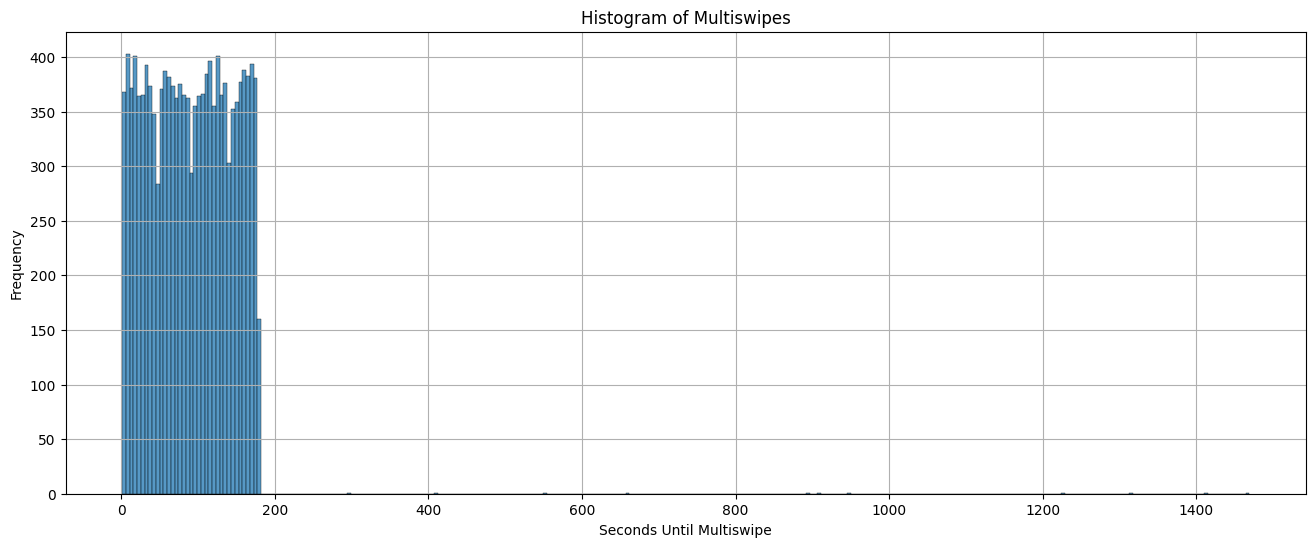

In [3]:
# Visualize recurring merchant transactions within a 30 minute window
plt.figure(figsize=(16, 6))
sns.histplot(data=dupe_df[(dupe_df["multiSwipeDiffSeconds"]<1800) & (dupe_df["multiSwipeDiffSeconds"]!=0)], x="multiSwipeDiffSeconds", bins=300)
plt.title("Histogram of Multiswipes")
plt.xlabel("Seconds Until Multiswipe")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()